In [30]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import log_loss
from tqdm import tqdm


def initialisation(hidden_layers):
    hyperparams = {}
    for i in range(1,len(hidden_layers)):
        hyperparams['w' + str(i)] = np.random.randn(hidden_layers[i], hidden_layers[i-1])
        hyperparams['b' + str(i)] = np.random.randn(hidden_layers[i], 1)

    return hyperparams

def forward_propagation(x, hyperparams):
    activation = {'a0': x}
    for i in range(1,len(hyperparams)//2 + 1):
        z = hyperparams['w' + str(i)].dot(activation['a'+ str(i-1)]) + hyperparams['b' + str(i)]
        activation['a' + str(i)] = 1 / (1 + np.exp(-z))

    return activation


def backward_propagation(x, y, activation, hyperparams):
    dZ = activation['a' + str(len(activation)-1)] - y
    gradients = {}
    for i in range(len(activation)-1,0,-1):
        gradients['dw' + str(i)] = 1 / y.shape[1] * dZ.dot(activation['a' + str(i-1)].T)
        gradients['db' + str(i)] = 1 / y.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        if i>1:
            dZ = np.dot(hyperparams['w'+ str(i)].T, dZ) * activation['a' + str(i-1)] * (1 - activation['a' + str(i-1)])

    return gradients


def update(hyperparams, gradients, learning_rate):
    for i in range(1,len(hyperparams)//2+1):
        hyperparams['w' + str(i)] = hyperparams['w' + str(i)] - learning_rate * gradients['dw' + str(i)]
        hyperparams['b' + str(i)] = hyperparams['b' + str(i)] - learning_rate * gradients['db' + str(i)]

def predict(x, hyperparams):
    activations = forward_propagation(x, hyperparams)
    return activations['a' + str(len(activations)-1)] >= 0.5


def neural_network(x_train, y_train, x_test, y_test, hidden_layers, learning_rate=0.1, n_iter=100):
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    hidden_layers.insert(0,x_train.shape[0])
    hidden_layers.append(1)
    hyperparams = initialisation(hidden_layers)
    for i in tqdm(range(n_iter)):
        activation = forward_propagation(x_train, hyperparams)

        if not (i % 10):
            #Train
            loss_train = log_loss(y_train.flatten(), activation['a' + str(len(hidden_layers)-1)].flatten())
            y_train_pred = predict(x_train, hyperparams)
            train_loss.append(loss_train)
            train_acc.append(accuracy_score(y_train.flatten(), y_train_pred.flatten()))

            #Test
            test_activation = forward_propagation(x_test, hyperparams)
            loss_test = log_loss(y_test.flatten(), test_activation['a' + str(len(hidden_layers)-1)].flatten())
            test_loss.append(loss_test)
            y_test_pred = predict(x_test, hyperparams)
            test_acc.append(accuracy_score(y_test.flatten(), y_test_pred.flatten()))

        gradients = backward_propagation(x_train, y_train, activation, hyperparams)
        update(hyperparams, gradients, learning_rate)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="Train loss")
    plt.plot(test_loss, label="Test loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="Train accuracy")
    plt.plot(test_acc, label="Test accuracy")
    plt.legend()
    return hyperparams

##### CatDog classification using deep neural network with diffrent structures

In [24]:
from sklearn.preprocessing import MinMaxScaler
from data_loader import load_data


def preprocessing(x_train, x_test, y_train, y_test):
    minmax = MinMaxScaler()
    x_train = np.array([elt.flatten() for elt in x_train])
    x_test = np.array([elt.flatten() for elt in x_test])
    x_train = minmax.fit_transform(x_train)
    x_test = minmax.transform(x_test)
    return x_train.T, x_test.T, y_train.T, y_test.T


x_train, y_train, x_test, y_test = load_data()
x_train, x_test, y_train, y_test = preprocessing(x_train, x_test, y_train, y_test)

100%|██████████| 1000/1000 [00:15<00:00, 62.83it/s]


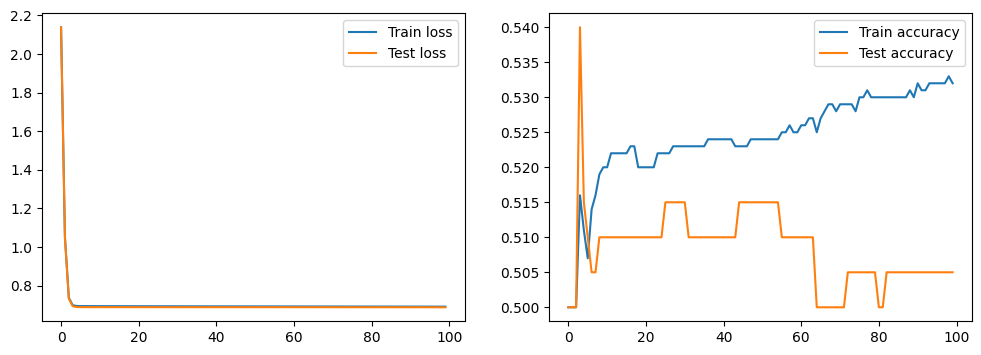

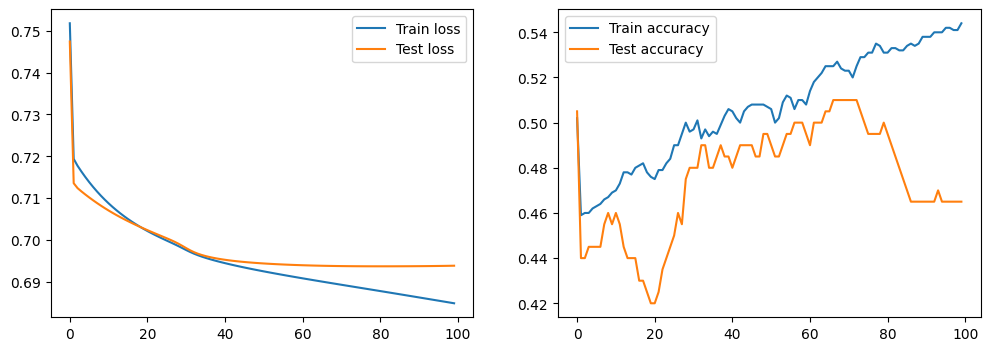

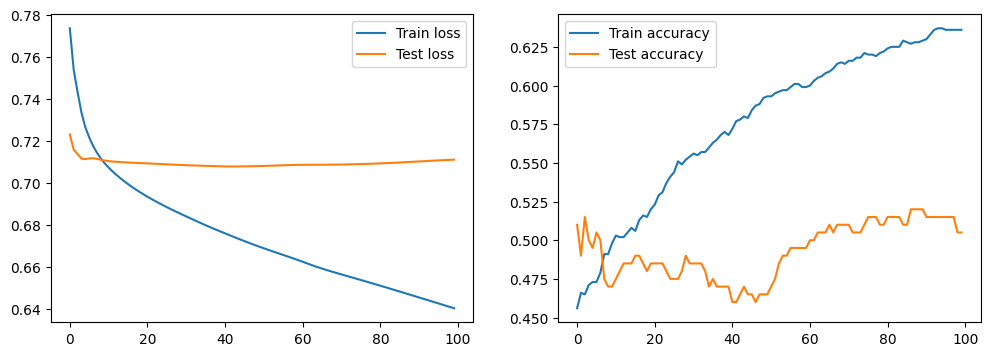

In [31]:
hidden_layers = []
for i in range(3):
    hidden_layers = [2**(3+i) for j in range(3)]
    best_hyperparams = neural_network(x_train, y_train, x_test, y_test, hidden_layers=hidden_layers, n_iter=1000)